In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df=pd.read_csv(r"C:\Users\Sangeeta\Downloads\P74-Project-6\Project 6\emails.csv")

In [3]:
df

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0


In [4]:
df.describe()

,spam
count,5728.000000
mean,0.238827
std,0.426404
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


In [6]:
ham=df[df['spam']==0]

In [7]:
ham

,text,spam
1368,"Subject: hello guys , i ' m "" bugging you "" f...",0
1369,Subject: sacramento weather station fyi - - ...,0
1370,Subject: from the enron india newsdesk - jan 1...,0
1371,Subject: re : powerisk 2001 - your invitation ...,0
1372,Subject: re : resco database and customer capt...,0
...,...,...
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0


In [8]:
spamm=df[df['spam']==1]

In [9]:
spamm

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
1363,Subject: are you ready to get it ? hello ! v...,1
1364,Subject: would you like a $ 250 gas card ? do...,1
1365,"Subject: immediate reply needed dear sir , i...",1
1366,Subject: wanna see me get fisted ? fist bang...,1


In [10]:
print('The spam percentage=',(len(spamm)/len(df))*100)

The spam percentage= 23.88268156424581


In [11]:
print('The non-spam percentage=',(len(ham)/len(df))*100)

The non-spam percentage= 76.11731843575419


<Axes: ylabel='count'>

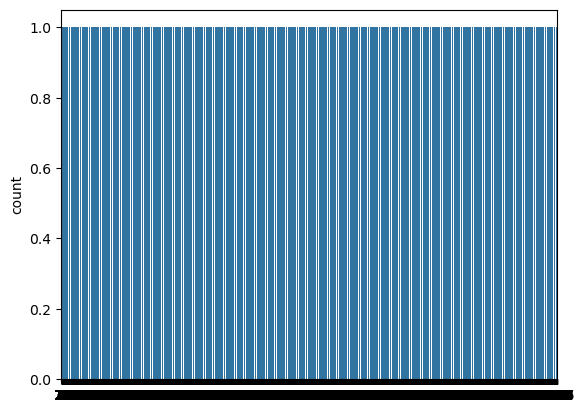

In [12]:
sns.countplot(df['spam'])

In [13]:
#COUNT VECTORIZER: 
from sklearn.feature_extraction.text import CountVectorizer
sample_data=['This is the first document','This is the second document','This is the third document']
sample_vectorizer=CountVectorizer()

In [14]:
sample_vectorizer

CountVectorizer()

In [16]:
sample_vectorizer.fit_transform(sample_data).toarray()

array([[1, 1, 1, 0, 1, 0, 1],
       [1, 0, 1, 1, 1, 0, 1],
       [1, 0, 1, 0, 1, 1, 1]])

In [17]:
print(sample_vectorizer.get_feature_names_out())

['document' 'first' 'is' 'second' 'the' 'third' 'this']


In [18]:
vectorizer=CountVectorizer()

In [19]:
spam_ham_count_vectorizer=vectorizer.fit_transform(df['text'])

In [24]:
print(spam_ham_count_vectorizer.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [4 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [25]:
from sklearn.naive_bayes import MultinomialNB

In [26]:
NB_classififer=MultinomialNB()

In [27]:
label=df['spam'].values

In [28]:
NB_classififer.fit(spam_ham_count_vectorizer,label)

MultinomialNB()

In [29]:
testing_sample=['Free money!!!!!','Please reach out when free']

In [35]:
label.shape

(5728,)

In [36]:
spam_ham_count_vectorizer.shape

(5728, 37303)

In [41]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

# Vectorizing the training data
vectorizer = CountVectorizer()
spam_ham_count_vectorizer = vectorizer.fit_transform(df['text'])

# Naive Bayes model
NB_classifier = MultinomialNB()
label = df['spam'].values
NB_classifier.fit(spam_ham_count_vectorizer, label)

# Preparing the testing sample
testing_sample = ['Free money!!!!!', 'Please reach out when free']
testing_sample_vect = vectorizer.transform(testing_sample)  # Use transform instead of fit_transform

# Predicting on the testing sample
test_predict = NB_classifier.predict(testing_sample_vect)

print("Predictions:", test_predict)



Predictions: [1 1]


In [42]:
X=spam_ham_count_vectorizer
y=label
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y)

In [43]:
X.shape

(5728, 37303)

In [44]:
y.shape

(5728,)

In [45]:
from sklearn.naive_bayes import MultinomialNB

NB_classifier=MultinomialNB()

NB_classifier.fit(X_train,y_train)


MultinomialNB()

In [47]:
from sklearn.metrics import classification_report, confusion_matrix
y_train_pred=NB_classifier.predict(X_train)
print(confusion_matrix(y_train,y_train_pred))
print(classification_report(y_train,y_train_pred))

[[3282   14]
 [   0 1000]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3296
           1       0.99      1.00      0.99      1000

    accuracy                           1.00      4296
   macro avg       0.99      1.00      1.00      4296
weighted avg       1.00      1.00      1.00      4296



In [48]:
y_test_pred=NB_classifier.predict(X_test)
print(confusion_matrix(y_test,y_test_pred))
print(classification_report(y_test,y_test_pred))

[[1051   13]
 [   3  365]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1064
           1       0.97      0.99      0.98       368

    accuracy                           0.99      1432
   macro avg       0.98      0.99      0.99      1432
weighted avg       0.99      0.99      0.99      1432



In [71]:
test2=['From Slump To Pump: The It Girls’ Guide To Getting Back On Track','Shingles and the Vaccine: Common Questions Answered']

In [72]:
test2_vect=vectorizer.transform(test2)
test2_pred=NB_classifier.predict(test2_vect)
print(test2_pred)

[1 1]
